# Session 5 (aid): 2 and 3D plotting and other useful features
_Author: g.savini@ucl.ac.uk <br>
Updated: 20/01/2021_

<div class="alert alert-success">
<p>
<b>This notebook is to be used as a resource on how to use a range of advanced plots (both two and three-dimensional) for the rappresentation of data, imaging and related tasks.</b>
</p>
    
<p> In this session, you should be able to:
<ul>
 <li> Produce contour and surface plots of two-dimensional scalar data</li>
 <li> Produce quiver and stream plots of two dimensional vector data</li>
 <li> Overlay contour plots on images</li>
 <li> 3D surface plots </li>
 </ul> </p>

The plot types discussed here can be also found on this <a href="https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html"> link</a>
</div>

## Contents:

* [1. Image mapping and density plots](#imagemapping)
* [2. Contour plots](#contourplots)
* [3. Plotting vector fields](#vectorfields)

In [38]:
# plot figures embedded in the notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# The following line makes the images a bit larger than default - works better on a large screen
plt.rcParams['figure.figsize'] = 15,12

##### <a id="imagemapping"></a>1. Image mapping - contour plots

You've already used "standard" plots and images in our previous sessions.

We'll start by looking at a simple example. 
Let's define two 2D arrays of 400x400 which rappresent the x and y coordinates of all the points on any array of the same size.

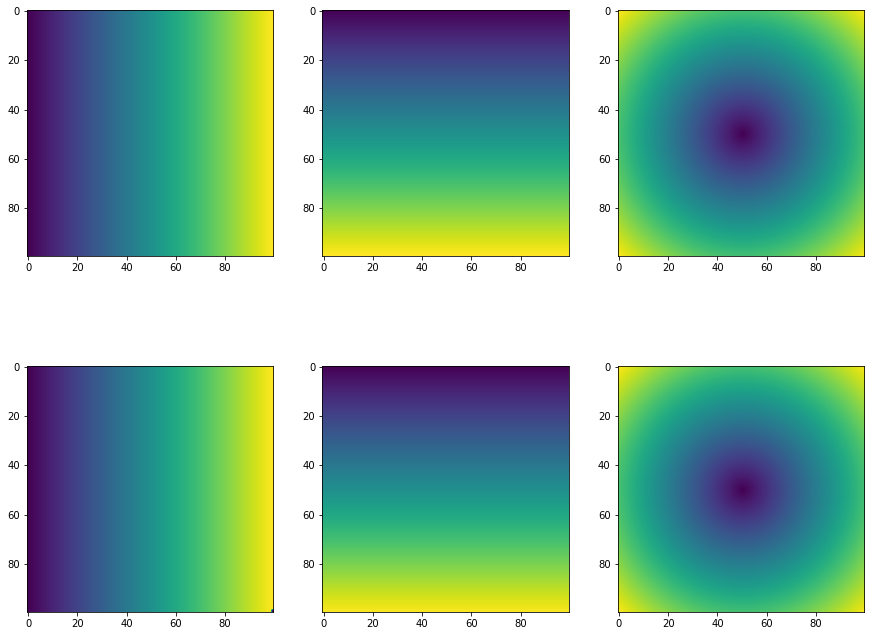

In [39]:
asize=100.
xtemp = np.arange(-asize/2, asize/2, 1.0)
ytemp = np.arange(-asize/2, asize/2, 1.0)
xx, yy = np.meshgrid(xtemp, ytemp)
rr = np.sqrt((xx/100.0)**2 + (yy/100.0)**2)

# Here we show 3 figures. The first has the x coordinate as the value of each pixel, the second, "y" and the 3rd "r" as the
# distance from the center.

plt.figure(figsize=(15,12))
plt.subplot(231)
plt.imshow(xx)
plt.subplot(232)
plt.imshow(yy)
plt.subplot(233)
plt.imshow(rr)

# This could also be done in a more tedious way
msize=100
temp  = np.linspace(0,msize,msize*msize)
temp2 = np.reshape(temp,(msize,msize))
yy2 = np.floor(temp2)
temp3 = msize*(temp2-yy2)
xx2 = np.floor(temp3)

#CHECK
#print(cc[0:2,0:2])
#print(yy[0:2,0:2])
#print(xx[0:2,0:2])

rr2 = np.sqrt((xx2-asize/2)**2+(yy2-asize/2)**2)

plt.subplot(234)
plt.imshow(xx2)
plt.subplot(235)
plt.imshow(yy2)
plt.subplot(236)
plt.imshow(rr2)

# You can compare the images. These are very similar... but in the second set we were forced to use integers as floats
# can't always be used in python to define arrays

What you are seeing above is arrays of "x", "y" and "r" values (from left to right).

The "r" are coordinate values (like looking at a cone from the top. In fact let's see if there is a way to view these quantities as if they were a surface of values.

<function matplotlib.pyplot.show(*args, **kw)>

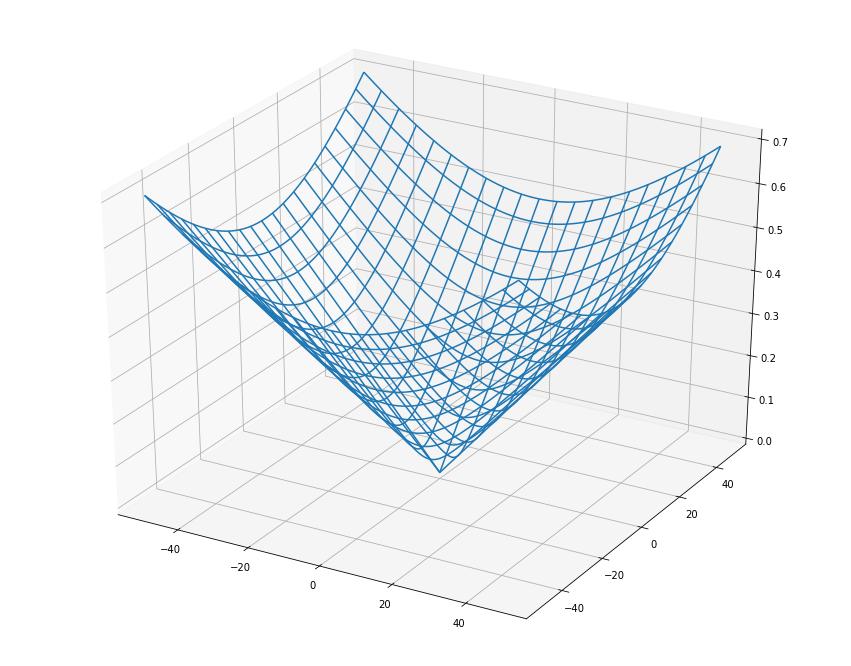

In [40]:
#To introduce a range of 3D plots, we need to import another library
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

msize=100.
XX = np.arange(-msize/2, msize/2, 1.0)
YY = np.arange(-msize/2, msize/2, 1.0)
XX, YY = np.meshgrid(XX, YY)
RR = np.sqrt((XX/100.0)**2 + (YY/100.0)**2)

# We can plot this as a wireframe...
surf = ax.plot_wireframe(XX, YY, RR, rstride=5, cstride=5)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

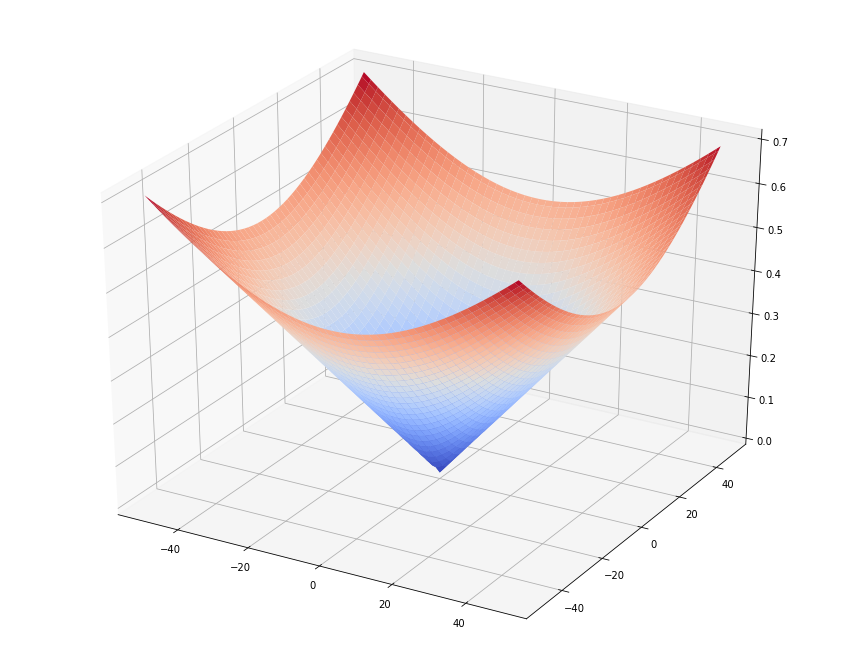

In [41]:
# We can plot this as a surface...
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(XX, YY, RR, cmap=cm.coolwarm) # Where we have loaded a specific color table to help visualize z values
plt.show

Or we can simply look at the experimental points that exist in the array being visualized

<function matplotlib.pyplot.show(*args, **kw)>

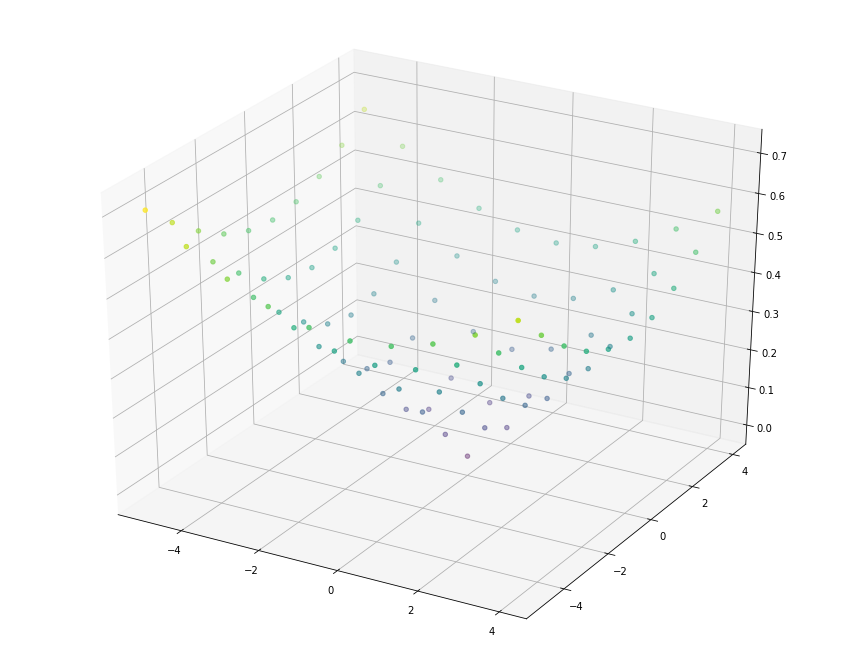

In [42]:
# We can plot this as a scatter plot.
# To show this better, we will recreate a sparser array:

msize=10.
X2 = np.arange(-msize/2, msize/2, 1.0)
Y2 = np.arange(-msize/2, msize/2, 1.0)
X2, Y2 = np.meshgrid(X2, Y2)
R2 = np.sqrt((X2/msize)**2 + (Y2/msize)**2)


fig = plt.figure()
ax = fig.gca(projection='3d')
#surf = ax.scatter(X, Y, R) # FOr default colouring
# To add colouring an additional array can be added, but format must be consistent with Nx3 for RGB colour coding
fX = X2.flatten()
fY = Y2.flatten()
fR = R2.flatten()
fc = fR
surf = ax.scatter(fX, fY, fR, c=fc) # To allow easy creation of the colour vector, we flattened all coordinates prior to plotting
plt.show

With these arrays defined we can then plot which ever function we see fit... in whichever style is most appropriate.

<function matplotlib.pyplot.show(*args, **kw)>

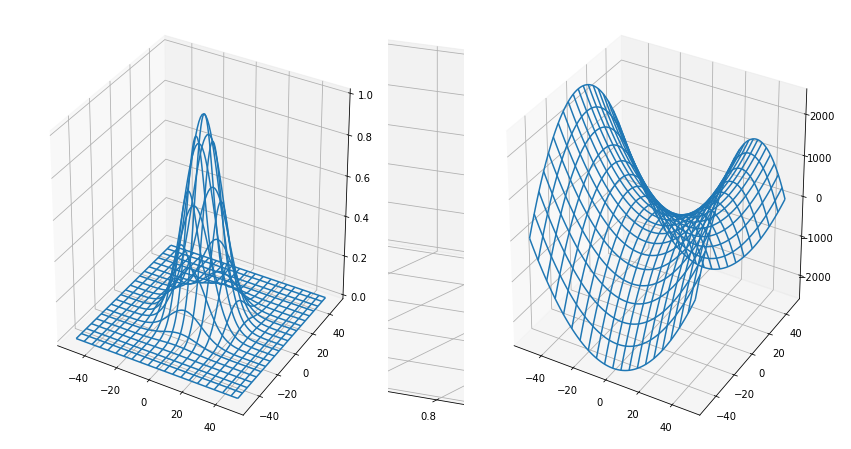

In [43]:
# Gaussian:
GG = np.exp(-(RR)**2/(0.02))
# Saddle:
SA = XX**2-YY**2

plt.rcParams['figure.figsize'] = 15,8
fig = plt.figure()

ax = fig.gca(projection='3d')
ax = fig.add_subplot(1,2,1, projection='3d')
surf = ax.plot_wireframe(XX, YY, GG, rstride=5, cstride=5)

ax = fig.gca(projection='3d')
ax = fig.add_subplot(1,2,2,projection='3d')
surf = ax.plot_wireframe(XX, YY, SA, rstride=5, cstride=5)
plt.show

##  <a id="contourplots"></a>2. Plotting contours and vector fields

### Example: electric potential

As an example for this, we're going to look at a standard example from electromagnetism that's useful to be able to visualise - the equipotential and electric field for a point charge.

The electric potential $V$ due to a point charge $Q$ is given by
$$
V = \frac{Q}{4\pi\varepsilon_0 r}
$$
where $r = |\mathbf{r}|$ is the distance between the point at which we are measuring the potential  and the position of the charge.

For these purposes, we'll work in convenient units where $1/(4\pi\varepsilon_0) = 1$, and we'll put a point charge of magnitude 1 at a position $\mathbf{r} = (1,0)$:

In [94]:
qpos = [0,0] # point charge at position x, y
q = 1        # charge is positive, magnitude 1

# now we'll create the 2d grid:
gridsize = 50j # using a complex number ensures we include the final point. See mgrid documentation.
y,x = np.mgrid[-5:5:gridsize, -5:5:gridsize] # create our grid
print("The grid of x points has shape", np.shape(x))
print("The grid of y points has shape", np.shape(y))

The grid of x points has shape (50, 50)
The grid of y points has shape (50, 50)


In [95]:
def potential(x,y,qpos,s):
    r_pos = np.sqrt((x-qpos[0])**2+(y-qpos[1])**2)
    V = s / r_pos
    return V

The code cell below will call your function for our grid of x- and y- coordinates to calculate the electric potential due to the positive charge at `qpos`.

In [96]:
V = potential(x,y,qpos,q) # calculates whole grid/matrix of electric potentials for our positive charge

print(V) # check that you get an array output!

[[0.14142136 0.14433631 0.14730598 ... 0.14730598 0.14433631 0.14142136]
 [0.14433631 0.14743929 0.1506089  ... 0.1506089  0.14743929 0.14433631]
 [0.14730598 0.1506089  0.15399214 ... 0.15399214 0.1506089  0.14730598]
 ...
 [0.14730598 0.1506089  0.15399214 ... 0.15399214 0.1506089  0.14730598]
 [0.14433631 0.14743929 0.1506089  ... 0.1506089  0.14743929 0.14433631]
 [0.14142136 0.14433631 0.14730598 ... 0.14730598 0.14433631 0.14142136]]


Now we've calculated V, we can plot the equipotentials using the [plt.contour](http://matplotlib.org/api/pyplot_api.html?highlight=contour#matplotlib.pyplot.contour) function. The cell below will do this for us.

The shape of our electric potential array V is (50, 50)


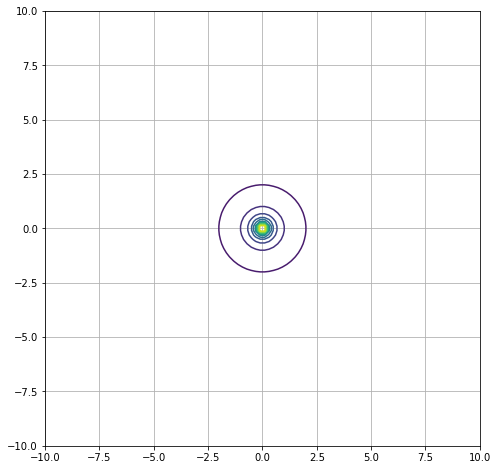

In [97]:
# The shape of V should be the same as the shape of x and y that we checked above.
print("The shape of our electric potential array V is", np.shape(V))

ncontours = 15 # the number of equally spaced (in value space) contour lines to plot. Leave this out to just use the default value

# Plot the variable V on the grid defined by x and y, using ncontours contour lines.
plt.figure()
plt.contour(x,y,V,ncontours)

plt.grid()                 # include gridlines on the plot.
plt.axis('scaled')         # aspect ratio 1:1
plt.axis([-10,10,-10,10]); # specify xlim,ylim for the plot

If you have correctly calculated `V`, you should see concentric circles centred on the charge position given in `qpos`. Try changing `qpos` and check that the charge position on the plot moves.

We can choose various different settings for the contours, and even combine this with the density plots from above, using plt.imshow. Experiment with the cell below to find the effect you feel best displays the data!

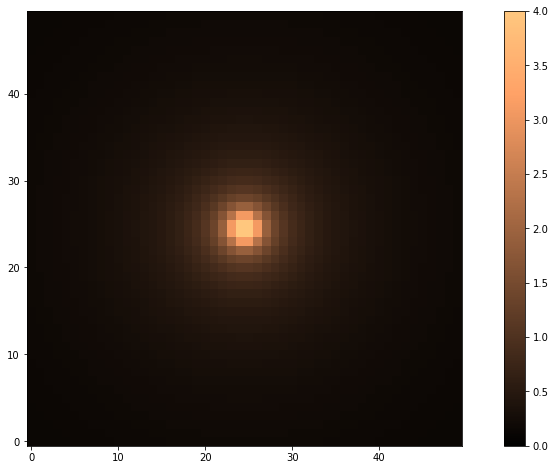

In [98]:
### STUDENT COMPLETED CELL ###
plt.figure()
plt.imshow(V,origin="lower",cmap="copper",vmin=0, vmax=4) 
plt.colorbar();                   # plots a bar indicating which value is mapped to which colour

Now we have the equipotentials sorted out, let's consider the electric field, which is of course a vector field. There are two ways of plotting vector fields in matplotlib, we'll look at both of them.

Before we can plot anything though, we need to calculate the electric field at each point on our grid of x and y values. This is given in a general form by
$$ \mathbf{E}(\mathbf{r}) = \frac{1}{4 \pi \varepsilon_0} \sum_i Q_i \frac{\mathbf{r_i}}{|\mathbf{r}_i|^3} $$

Here we're working in units where $1/(4\pi\varepsilon_0) = 1$, which simplifies things, and we only have a single charge. We need to calculate the vectors $\mathbf{r}$ though, which means our expression becomes

$$ \mathbf{E}(x,y) = q \frac{(x - q_x, y - q_y)}{\left[(x-q_x)^2 + (y-q_y)^2\right]^{3/2}} $$
where $(q_x, q_y) = $ `qpos`, and $q$ is the magnitude of the charge.

In [99]:
def Epoint(q,qpos,x,y):
    Ep = q*([x-qpos[0],y-qpos[1]])/((x-qpos[0])**2+(y-qpos[1])**2)**(1.5)
    return Ep

Once you've written the function, we can use it to calculate the electric field. This cell will produce two arrays, one containing the x-components of the E-field and one the y-components, for our charge +1 at `qpos`.  

In [100]:
Ex, Ey = Epoint(1,qpos,x,y) # calculate the electric field

We can check the shape of the outputs - this should be the same as the shape of `x` and `y`.

In [101]:
print("Shapes of our calculated field arrays:")
print(np.shape(Ex), np.shape(Ey))
print("Shapes of our grid arrays")
print(np.shape(x), np.shape(y))

Shapes of our calculated field arrays:
(50, 50) (50, 50)
Shapes of our grid arrays
(50, 50) (50, 50)


Again as a check, we can look at the value of the electric field at a single point. Let's choose the top left hand corner of the array, i.e. element [0,0]:

In [102]:
print("Value of the E-field at top LH corner of grid:", Ex[0,0], Ey[0,0])
print("Value of the electric potential at the same point:", V[0,0])

Value of the E-field at top LH corner of grid: -0.01414213562373095 -0.01414213562373095
Value of the electric potential at the same point: 0.1414213562373095


We can see from this (if your function is working!) that the E-field is indeed a vector, and is pointing in a direction away from the position of the (positive) charge, exactly as we'd expect.

Now let's think about how we want to plot this information. As mentioned above, there are two ways of doing this.

### "Quiver" plot

For each point on our x,y grid, this function plots an arrow whose length and direction corresponds to the magnitude and direction of the vector field at that point. Let's see how this looks:

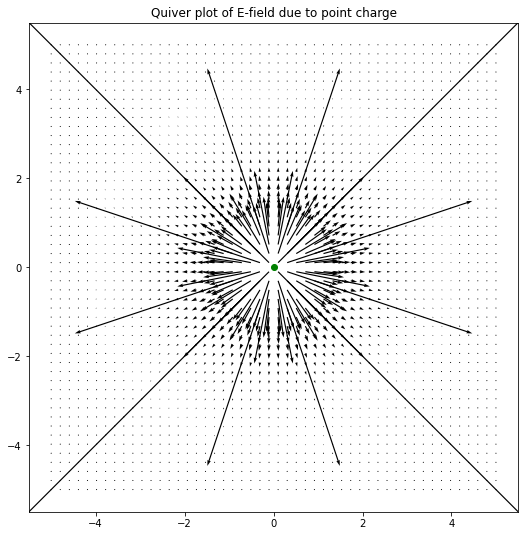

In [103]:
plt.figure(figsize=(9,9))
plt.quiver(x,y,Ex,Ey)
plt.plot(qpos[0],qpos[1],"go") # plot a small green circle at the position of the charge
plt.axis('scaled')             # aspect ratio 1:1
plt.title("Quiver plot of E-field due to point charge");

This can also be useful to plot polarization vectors on a map.